## Picos del Himalaya

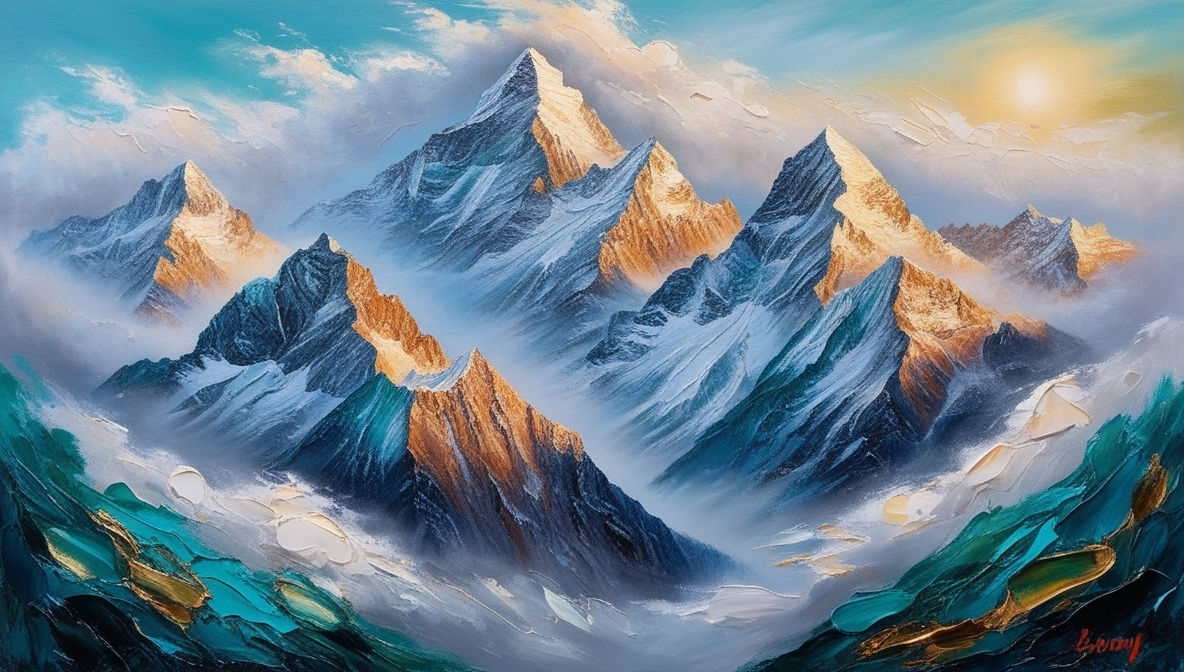

### Presentación de variables

**peak_id**: Identificación única del pico de la montaña. 

**peak_name**: Nombre del pico al que se refiere la expedición.

**peak_alternative_name**: Nombre alternativo del pico.

**height_metres**: Altura máxima alcanzada en metros durante la expedición.
	
**climbing_status**: Estado del pico, escalado o no escalado.

**first_ascent_year**: Año en que una montaña específica fue escalada por primera vez.

**first_ascent_country**: País en el cual se realizó la primera ascensión de una montaña específica. 

**first_ascent_expedition_id**: Identificador único o código asociado a la expedición que logró la primera ascensión de una montaña.

### 1. Empezamos lectura y preprocesamiento de datos.

In [1]:
# Importamos librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

In [21]:
# Leemos el dataset
peaks = pd.read_csv('peaks.csv')

### 1.1 Información del dataset

In [3]:
# Observamos nuestro dataset
peaks

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101
...,...,...,...,...,...,...,...,...
463,SANK,Sano Kailash,NaN,6452,Climbed,2019.0,"Austria, Nepal",SANK19101
464,TARS,Tarke Kang Shar,Tare Kang,7069,Climbed,1981.0,"Italy, Nepal",TARS81301
465,KORL,Korlang Pari Tippa,Korlang Pari Tippa North,5738,Unclimbed,NaN,NaN,NaN
466,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,NaN,NaN


In [4]:
# Observamos el tamaño del dataframe
peaks.shape

(468, 8)

In [5]:
# Vemos la información general
peaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   peak_id                     468 non-null    object 
 1   peak_name                   468 non-null    object 
 2   peak_alternative_name       245 non-null    object 
 3   height_metres               468 non-null    int64  
 4   climbing_status             468 non-null    object 
 5   first_ascent_year           336 non-null    float64
 6   first_ascent_country        336 non-null    object 
 7   first_ascent_expedition_id  333 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 29.4+ KB


In [6]:
# Vemos nulos y graficamos
peaks.isnull().sum()

peak_id                         0
peak_name                       0
peak_alternative_name         223
height_metres                   0
climbing_status                 0
first_ascent_year             132
first_ascent_country          132
first_ascent_expedition_id    135
dtype: int64

<Axes: >

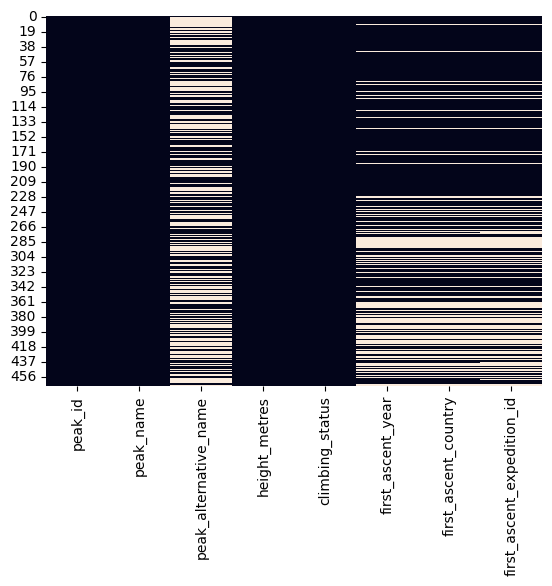

In [7]:
# Graficamos valores nulos
sns.heatmap(peaks.isnull(), cbar=False)

In [8]:
peaks

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101
...,...,...,...,...,...,...,...,...
463,SANK,Sano Kailash,NaN,6452,Climbed,2019.0,"Austria, Nepal",SANK19101
464,TARS,Tarke Kang Shar,Tare Kang,7069,Climbed,1981.0,"Italy, Nepal",TARS81301
465,KORL,Korlang Pari Tippa,Korlang Pari Tippa North,5738,Unclimbed,NaN,NaN,NaN
466,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,NaN,NaN


### 2. Tratamiento de variables

In [22]:
# Observamos la información de las columnas
peaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   peak_id                     468 non-null    object 
 1   peak_name                   468 non-null    object 
 2   peak_alternative_name       245 non-null    object 
 3   height_metres               468 non-null    int64  
 4   climbing_status             468 non-null    object 
 5   first_ascent_year           336 non-null    float64
 6   first_ascent_country        336 non-null    object 
 7   first_ascent_expedition_id  333 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 29.4+ KB


### 2.1 Eliminamos nulos

In [23]:
# Usamos esta función para quitar valores nulos
def quitar_nulos (df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

peaks = quitar_nulos (peaks)

In [11]:
peaks.isnull().sum()

peak_id                       0
peak_name                     0
peak_alternative_name         0
height_metres                 0
climbing_status               0
first_ascent_year             0
first_ascent_country          0
first_ascent_expedition_id    0
dtype: int64

In [12]:
peaks

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.000000,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,Junction Peak,5630,Climbed,1953.000000,UK,AMPG53101
2,ANN1,Annapurna I,Junction Peak,8091,Climbed,1950.000000,France,ANN150101
3,ANN2,Annapurna II,Junction Peak,7937,Climbed,1960.000000,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,Junction Peak,7555,Climbed,1961.000000,India,ANN361101
...,...,...,...,...,...,...,...,...
463,SANK,Sano Kailash,Junction Peak,6452,Climbed,2019.000000,"Austria, Nepal",SANK19101
464,TARS,Tarke Kang Shar,Tare Kang,7069,Climbed,1981.000000,"Italy, Nepal",TARS81301
465,KORL,Korlang Pari Tippa,Korlang Pari Tippa North,5738,Unclimbed,1979.077381,"Japan, Nepal",SPH462101
466,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,1979.077381,"Japan, Nepal",SPH462101


### 2.2 Eliminamos columnas del df peaks

In [24]:
# Tiramos las columnas que vemos innecesarias
peaks.drop(['peak_alternative_name','first_ascent_year','first_ascent_country','first_ascent_expedition_id'], axis=1, inplace=True)

In [14]:
peaks

,peak_id,peak_name,height_metres,climbing_status
0,AMAD,Ama Dablam,6814,Climbed
1,AMPG,Amphu Gyabjen,5630,Climbed
2,ANN1,Annapurna I,8091,Climbed
3,ANN2,Annapurna II,7937,Climbed
4,ANN3,Annapurna III,7555,Climbed
...,...,...,...,...
463,SANK,Sano Kailash,6452,Climbed
464,TARS,Tarke Kang Shar,7069,Climbed
465,KORL,Korlang Pari Tippa,5738,Unclimbed
466,JANE,Jannu East,7460,Unclimbed


## 3. EDA

### Top 5 Picos escalados mas altos

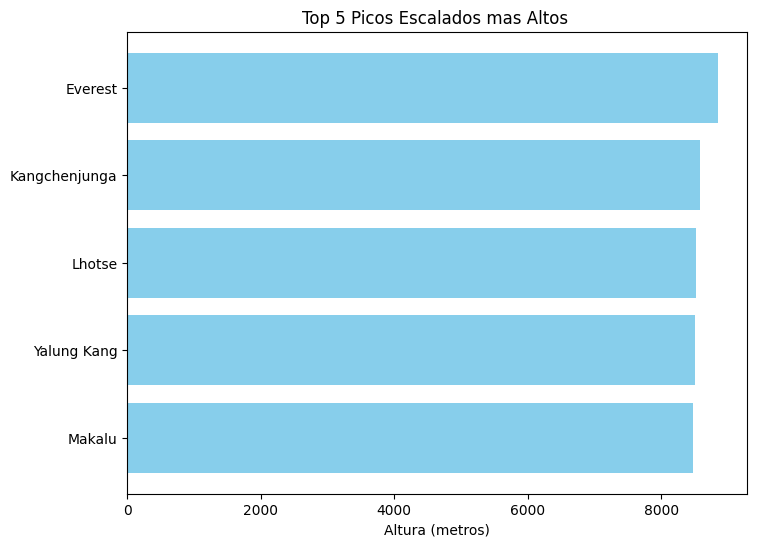

In [25]:

# Seleccionamos top 5 de picos más escalados
picos_escalados = peaks[peaks['climbing_status'] == 'Climbed']
top5_picos_escalados = picos_escalados.sort_values(by='height_metres', ascending=False).head(5)

plt.figure(figsize=(8, 6))
plt.barh(top5_picos_escalados['peak_name'], top5_picos_escalados['height_metres'], color='skyblue')
plt.xlabel('Altura (metros)')
plt.title('Top 5 Picos Escalados mas Altos ')
plt.gca().invert_yaxis()
plt.show()

### Top 5 Picos no escalados más altos

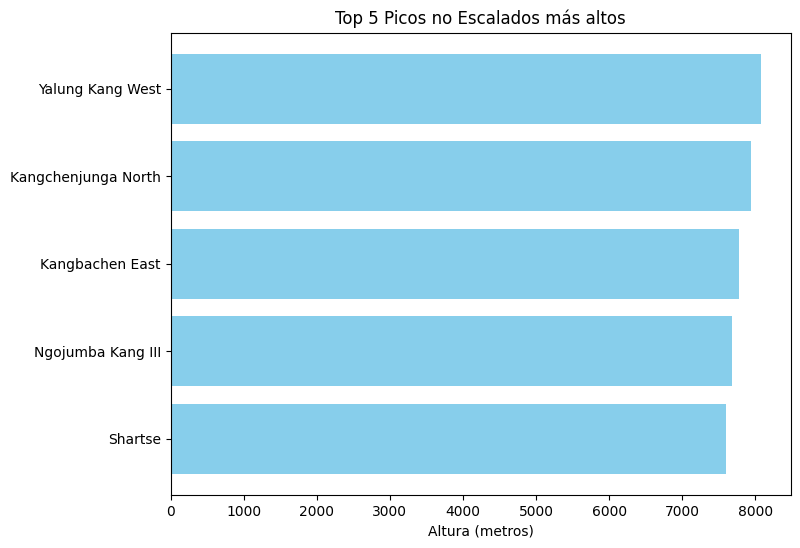

In [27]:
# Seleccionamos los 5 picos no escalados
picos_no_escalados = peaks[peaks['climbing_status'] == 'Unclimbed']
top5_picos_no_escalados = picos_no_escalados.sort_values(by='height_metres', ascending=False).head(5)

plt.figure(figsize=(8, 6))
plt.barh(top5_picos_no_escalados['peak_name'], top5_picos_no_escalados['height_metres'], color='skyblue')
plt.xlabel('Altura (metros)')
plt.title('Top 5 Picos no Escalados más altos')
plt.gca().invert_yaxis()
plt.show()

### Relación entre Picos Escalados vs Picos No Escalados

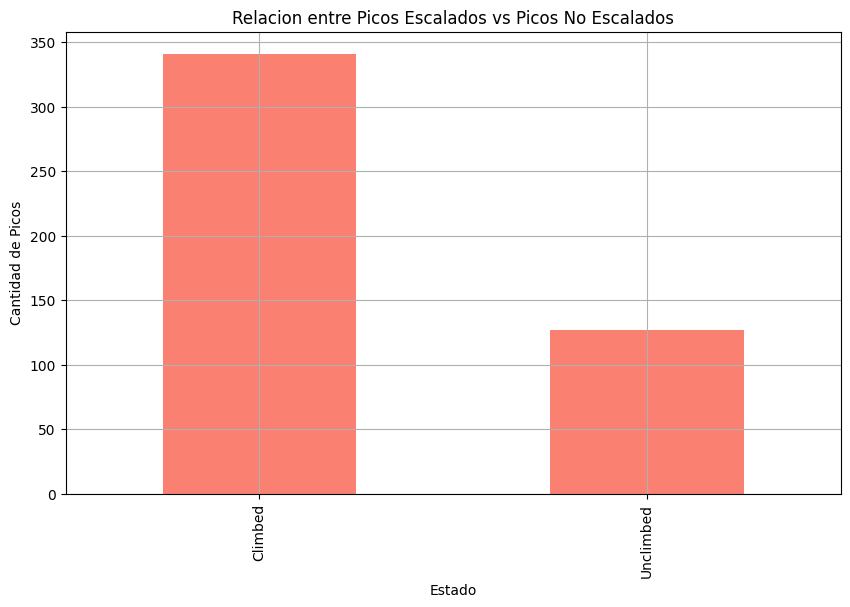

In [17]:
plt.figure(figsize=(10, 6))
peaks['climbing_status'].value_counts().plot(kind='bar', color='salmon')
plt.title('Relacion entre Picos Escalados vs Picos No Escalados')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Picos')
plt.grid(True)
plt.show()

In [28]:
# Realizamos una copia de seguridad
peaks_copy = peaks.copy()
peaks_copy.to_csv('peaks_copy.csv')

## 4. Pruebas estadísticas

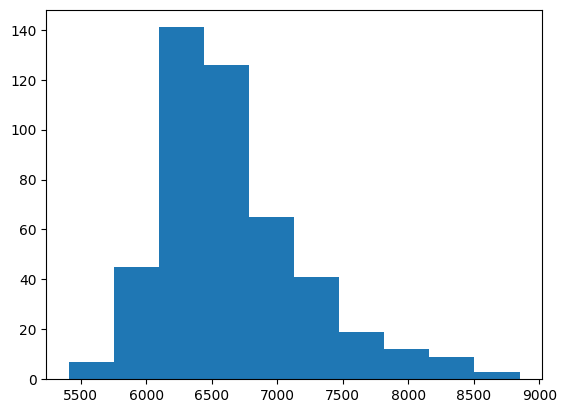

Estadístico=0.931544556919134, p-value=8.220656162317129e-14
La variable height_metres no sigue una distribución normal


In [19]:
# Para esta prueba, hemos decidido elegir la columna 'height_metres', ya que es la unica de esta dataset que presenta datos numericos y continuos, y por lo tanto, nos permitira evaluar si sigue una distribucion normal o no.
for columnas in ['height_metres']:
    plt.hist(peaks[columnas])
    plt.show()
    stat, p = shapiro(peaks[columnas])
    print(f'Estadístico={stat}, p-value={p}')
    if p < 0.05:
        print(f'La variable {columnas} no sigue una distribución normal')
    else:
        print(f'La variable {columnas} sigue una distribución normal')

### 4.1 Chi-cuadrado

In [20]:
# Vamos a comparar las variables categoricas 'climbing_status' y 'peak_name', para comprobar la relacion entre el estado de la montaña y su nombre.
tabla_contingencia = pd.crosstab(peaks['climbing_status'], peaks['peak_name'])
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Hay una relación significativa entre el estado de la montaña y su nombre')
else:
    print('No hay una relación significativa entre el estado de la montaña y su nombre')

Chi2: 468.0 P-value: 0.47826440913785767
No hay una relación significativa entre el estado de la montaña y su nombre
